<a href="https://colab.research.google.com/github/otworiallan/otworiallan/blob/main/PyTorch_WorkFlow_Exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [138]:
import torch
from torch import nn

import numpy as np
import matplotlib.pyplot as plt

In [139]:
device = "cuda" if torch.cuda.is_available() else "cpu"

weight = 0.3
bias = 0.9

start = 0
end = 2
step = 0.01

X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

train_split = int(0.8 * len(X))
train_split

160

In [140]:
X_train = X[:train_split:].type(torch.float).to(device)
y_train = y[:train_split:].type(torch.float).to(device)
X_test = X[train_split::].type(torch.float).to(device)
y_test = y[train_split::].type(torch.float).to(device)
X_train.dtype

torch.float32

In [141]:
def plot_predictions(train_data=X_train.cpu(), train_label=y_train.cpu(),
                     test_data=X_test.cpu(), test_label=y_test.cpu(),
                     predictions=None):
    """
    Plots training data, test data and compares predictions
    """

    plt.figure(figsize=(12,7))

    plt.scatter(train_data, train_label, c="b", s=4, label="Training Data")

    plt.scatter(test_data, test_label, c="g", s=4, label="Test data")

    if predictions is not None:
        plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")



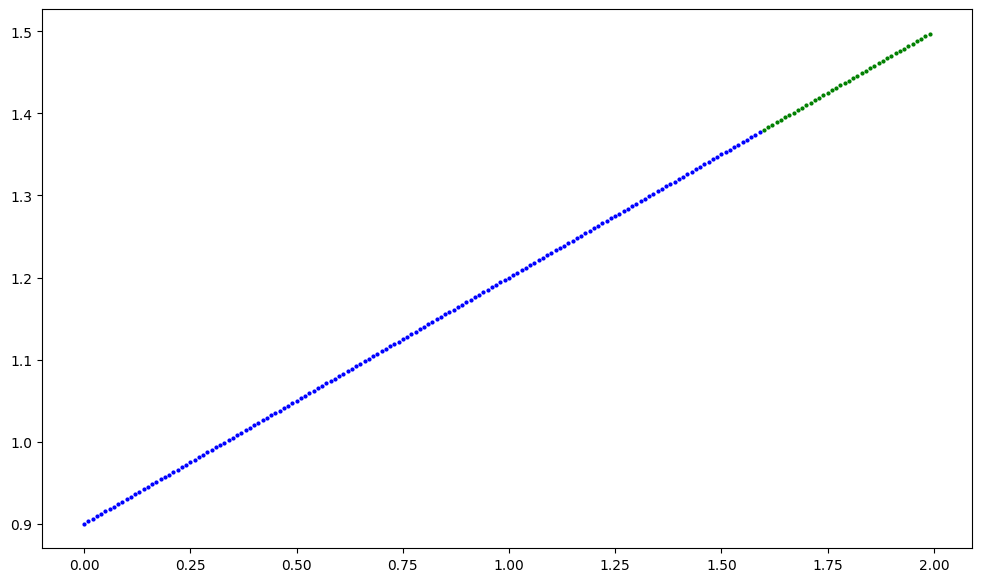

In [142]:
plot_predictions()

In [143]:
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()

        torch.manual_seed(0)
        self.linear_layer = nn.Linear(in_features=1, out_features=1,
                                      dtype=torch.float)

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.linear_layer(x)


In [144]:
model = LinearRegressionModel()
model.to(device)

LinearRegressionModel(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)

In [145]:
loss = nn.L1Loss(reduction="mean")
optimizer = torch.optim.SGD(params=model.parameters(), lr=0.01)



In [146]:
def train_loop(epochs):
    for epoch in range(epochs):
        model.train()
        y_preds = model(X_train)
        train_loss = loss(y_preds, y_train)
        optimizer.zero_grad()
        train_loss.backward()
        optimizer.step()

        if epoch % 20 == 0:
            print(f"Epoch: {epoch} -> Loss: {train_loss}")



In [147]:
model.state_dict()

OrderedDict([('linear_layer.weight', tensor([[-0.0075]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.5364], device='cuda:0'))])

In [161]:
def test_loop():
    model.eval()
    with torch.inference_mode():
        return model(X_test)


In [149]:
train_loop(epochs=300)

Epoch: 0 -> Loss: 0.6080083847045898
Epoch: 20 -> Loss: 0.2816036343574524
Epoch: 40 -> Loss: 0.005812705960124731
Epoch: 60 -> Loss: 0.005812705960124731
Epoch: 80 -> Loss: 0.005812705960124731
Epoch: 100 -> Loss: 0.005812705960124731
Epoch: 120 -> Loss: 0.005812705960124731
Epoch: 140 -> Loss: 0.005812705960124731
Epoch: 160 -> Loss: 0.005812705960124731
Epoch: 180 -> Loss: 0.005812705960124731
Epoch: 200 -> Loss: 0.005812705960124731
Epoch: 220 -> Loss: 0.005812705960124731
Epoch: 240 -> Loss: 0.005812705960124731
Epoch: 260 -> Loss: 0.005812705960124731
Epoch: 280 -> Loss: 0.005812705960124731


In [150]:
model.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.2948]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.9099], device='cuda:0'))])

In [162]:
y_preds = test_loop()
y_preds

tensor([[1.3816],
        [1.3846],
        [1.3875],
        [1.3905],
        [1.3934],
        [1.3964],
        [1.3993],
        [1.4023],
        [1.4052],
        [1.4082],
        [1.4111],
        [1.4141],
        [1.4170],
        [1.4200],
        [1.4229],
        [1.4259],
        [1.4288],
        [1.4317],
        [1.4347],
        [1.4376],
        [1.4406],
        [1.4435],
        [1.4465],
        [1.4494],
        [1.4524],
        [1.4553],
        [1.4583],
        [1.4612],
        [1.4642],
        [1.4671],
        [1.4701],
        [1.4730],
        [1.4760],
        [1.4789],
        [1.4819],
        [1.4848],
        [1.4878],
        [1.4907],
        [1.4937],
        [1.4966]], device='cuda:0')

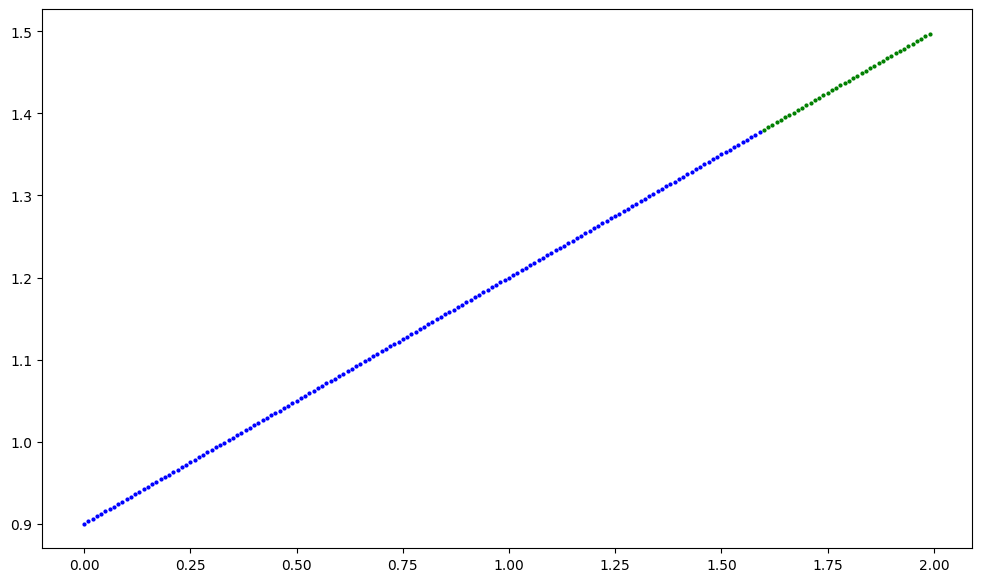

In [152]:
plot_predictions(predictions=y_preds)

In [153]:
#Saving and Loading the Model's State Dict

from pathlib import Path

MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

MODEL_NAME = "linear_regression_models_exercise.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

torch.save(obj=model.state_dict(), f=MODEL_SAVE_PATH)

In [154]:
#loading a model
loaded_model = LinearRegressionModel()
loaded_model.to(device)

LinearRegressionModel(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)

In [155]:
loaded_model.state_dict()

OrderedDict([('linear_layer.weight', tensor([[-0.0075]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.5364], device='cuda:0'))])

In [156]:
loaded_model.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

<ipython-input-156-b454b0416473>:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  loaded_model.load_state_dict(torch.load(f=MODEL_SAVE_PATH))


<All keys matched successfully>

In [157]:
loaded_model.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.2948]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.9099], device='cuda:0'))])

In [158]:
loaded_model.eval()
with torch.inference_mode():
    loaded_model_preds = loaded_model(X_test)
loaded_model_preds

tensor([[1.3816],
        [1.3846],
        [1.3875],
        [1.3905],
        [1.3934],
        [1.3964],
        [1.3993],
        [1.4023],
        [1.4052],
        [1.4082],
        [1.4111],
        [1.4141],
        [1.4170],
        [1.4200],
        [1.4229],
        [1.4259],
        [1.4288],
        [1.4317],
        [1.4347],
        [1.4376],
        [1.4406],
        [1.4435],
        [1.4465],
        [1.4494],
        [1.4524],
        [1.4553],
        [1.4583],
        [1.4612],
        [1.4642],
        [1.4671],
        [1.4701],
        [1.4730],
        [1.4760],
        [1.4789],
        [1.4819],
        [1.4848],
        [1.4878],
        [1.4907],
        [1.4937],
        [1.4966]], device='cuda:0')

In [163]:
y_preds == loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]], device='cuda:0')